<a href="https://colab.research.google.com/github/adryduty/demo-repo/blob/main/For_labelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import time

In [ ]:
def label_maker(upper_left, bottom_right, n_cells):
  '''
  CONSIDER THAT YOU HAVE A 20x20 MATRIX AND THAT THE PIXELS ARE NORMALIZED TO 1 (they go from 0 to 1)

  This function takes the upper left and the bottom right squares as input and returns:
  - 0 (indicating the class: here is just 0 because we have just Ghiri)
  - X_c (X coordinate of the center of the bounding box)
  - Y_C (Y coordinate of the center of the bounding box)
  - Width of the bounding box
  - Height of the buonding box
  '''
  
  if (bottom_right % n_cells) < (upper_left % n_cells):
    print("Wrong input")
    
  elif (upper_left // n_cells) > (bottom_right // n_cells):
    print("Wrong input")

  else:
    num_squares_height = 1 + (bottom_right - upper_left) // n_cells
    height = num_squares_height / n_cells

    num_squares_width = 1 + (bottom_right - upper_left) % n_cells
    width = num_squares_width / n_cells 
    x_a = (upper_left % n_cells + 0.5) / n_cells
    y_a = (upper_left // n_cells + 0.5) / n_cells

    x_b = (bottom_right % n_cells + 0.5) / n_cells
    y_b = (bottom_right // n_cells + 0.5) / n_cells

    x_c = (x_a + x_b)/2
    y_c = (y_a + y_b)/2

    return 0, x_c, y_c, width, height 


In [ ]:
label_maker(15,43,10)

Wrong input


In [ ]:
np.arange(10)+np.arange(0,100,10)[:,np.newaxis]

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

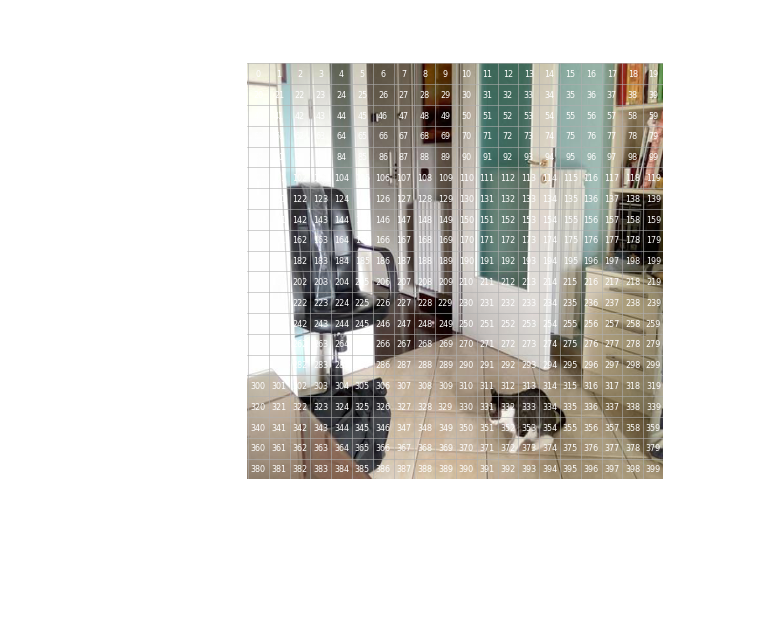

In [106]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from PIL import Image

# Open image file
def grid_image(google_path_image):
  '''
  This function takes as input the google path of the image you want to apply the onto.
  The output is the picture with the squares. 
  '''

  img = Image.open(google_path_image)
  my_dpi=416.

  img = img.resize(size=(416, 416))

  # Set up figure
  fig=plt.figure(figsize=(float(img.size[0])/my_dpi,float(img.size[1])/my_dpi),dpi=my_dpi)
  ax=fig.add_subplot(111)

  # Remove whitespace from around the image
  fig.subplots_adjust(left=0,right=1,bottom=0,top=1)

  # Set the gridding interval: here we use the major tick interval
  myInterval= 20.8
  loc = plticker.MultipleLocator(base=myInterval)
  ax.xaxis.set_major_locator(loc)
  ax.yaxis.set_major_locator(loc)

  ax.tick_params(axis='x', colors=(0,0,0,0))
  ax.tick_params(axis='y', colors=(0,0,0,0))

  # Remove the borders 
  ax.spines['top'].set_visible(False) 
  ax.spines['right'].set_visible(False) 
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_visible(False)

  # Add the grid
  ax.grid(which='major', axis='both', linestyle='-', linewidth=0.1)

  # Add the image
  ax.imshow(img)

  # Find number of gridsquares in x and y direction
  nx=abs(int(float(ax.get_xlim()[1]-ax.get_xlim()[0])/float(myInterval)))
  ny=abs(int(float(ax.get_ylim()[1]-ax.get_ylim()[0])/float(myInterval)))

  # Add some labels to the gridsquares
  for j in range(ny):
      y=myInterval/2+j * myInterval
      for i in range(nx):
          x=myInterval/2.+float(i) * myInterval
          ax.text(x,y,'{:d}'.format(i+j*nx),color='w',ha='center',va='center', fontsize=1.4)

  plt.show()

grid_image('/content/27GHIRI.jpg')

In [109]:
label_maker(311, 375, 20)

(0, 0.675, 0.8500000000000001, 0.25, 0.2)

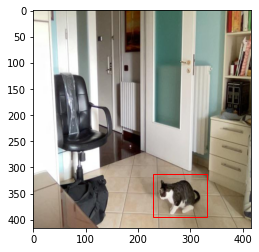

In [110]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

im = Image.open('/content/27GHIRI.jpg')
im = im.resize(size=(416,416))

# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(im)

# Create a Rectangle patch
rect = patches.Rectangle((0.55*416, 0.75*416), 0.25*416, 0.2*416, linewidth=1, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

In [ ]:
def rectangle_coordinates(x_c, y_c, width, height):
  '''
  This function takes the coordinates of the rectangle's center and the width and the height of a
  rectangle and returns the coordinates of the rectangle's bottom left angle and the width and the height
  multiplied by 416.
  '''

  x_bottom_left_angle = (x_c - width/2)*416

  y_bottom_left_angle = (y_c - height/2)*416

  width = width * 416

  height = height * 416

  return x_bottom_left_angle, y_bottom_left_angle, width, height



In [ ]:
def rectangle_maker(google_path_image, x_c, y_c, width, height):

  im = Image.open(google_path_image)
  im = im.resize(size=(416,416))

  # Create figure and axes
  fig, ax = plt.subplots()
  
  x_left_angle, y_left_angle, denorm_width, denorm_height = rectangle_coordinates(x_c, y_c, width, height)
  
  # Create a Rectangle patch
  rect = patches.Rectangle((x_left_angle, y_left_angle), denorm_width, denorm_height, linewidth=1, edgecolor='r', facecolor='none')

  # Add the patch to the Axes
  ax.add_patch(rect)

  ax.tick_params(axis='x', colors=(0,0,0,0))
  ax.tick_params(axis='y', colors=(0,0,0,0))

  # Remove the borders 
  ax.spines['top'].set_visible(False) 
  ax.spines['right'].set_visible(False) 
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_visible(False)

  # Display the image
  ax.imshow(im)

  plt.savefig('/' + google_path_image.split("/")[1]+'/with_rectangle_'+google_path_image.split("/")[2])


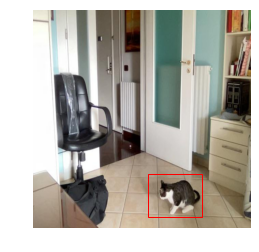

In [114]:
rectangle_maker('/content/27GHIRI.jpg', 0.6499999999999999, 0.8500000000000001, 0.25, 0.2)

In [ ]:
path_list = []
numbers = ['00','01', '02', '03', '04','05','06','07','08','09',10,11,12,13,14,15,16,17,20,21,22,23,
             24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,'010','011','012','013','014','015','016','017',
             210,211,212,213,214,310,311,312,313]
for number in numbers:
  path_list.append("/content/" + str(number) + "GHIRI.jpg")

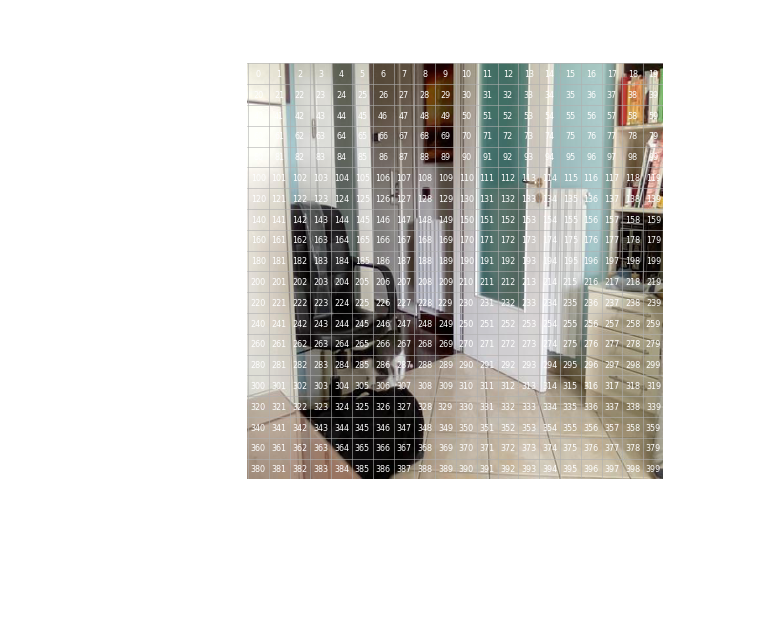

insert upper left square: 244
insert bottom right square: 307


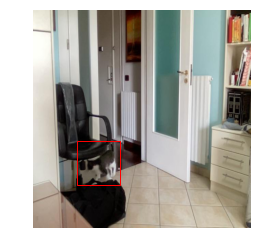

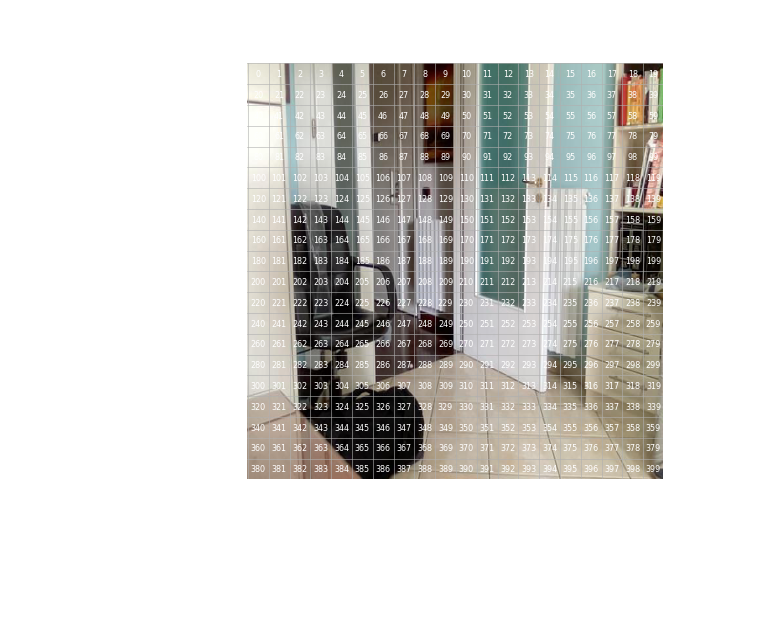

KeyboardInterrupt: ignored

In [108]:
label_vector = []

for path in path_list:

  grid_image(path)

  time.sleep(3)

  upper_left = int(input("insert upper left square: "))

  bottom_right = int(input("insert bottom right square: "))
  
  label, x_c, y_c, width, height = label_maker(upper_left, bottom_right, 20)

  label_vector.append([path, label, x_c, y_c, width, height])

  rectangle_maker(path, x_c, y_c, width, height)